In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from numpy import pi

In [121]:
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import random_statevector
from qiskit.quantum_info import state_fidelity

In [13]:
from qiskit import *
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc1 = QuantumCircuit(qr, cr)
qc1.x(qr)

qc2 = QuantumCircuit(qr, cr)
qc2.x(qr)

qc3 = qc1 + qc2

In [14]:
qc3.draw()

┌───┐┌───┐
q0_0: ┤ X ├┤ X ├
      ├───┤├───┤
q0_1: ┤ X ├┤ X ├
      └───┘└───┘
c0_0: ══════════
                
c0_1: ══════════

In [20]:
qr = QuantumRegister(4)
cr = ClassicalRegister(4)

In [70]:
def Even(params=[0,0,0,0]):
    qc = QuantumCircuit(qr,cr)
    qc.rz(params[0],0)
    qc.rz(params[1],1)
    qc.rz(params[2],2)
    qc.rz(params[3],3)
    qc.cz(0,1)
    qc.cz(0,2)
    qc.cz(0,3)
    qc.cz(1,2)
    qc.cz(1,3)
    qc.cz(2,3)
    return qc

In [71]:
Even().draw()

┌───────┐                  
q1_0: ┤ RZ(0) ├─■──■──■──────────
      ├───────┤ │  │  │          
q1_1: ┤ RZ(0) ├─■──┼──┼──■──■────
      ├───────┤    │  │  │  │    
q1_2: ┤ RZ(0) ├────■──┼──■──┼──■─
      ├───────┤       │     │  │ 
q1_3: ┤ RZ(0) ├───────■─────■──■─
      └───────┘                  
c1_0: ═══════════════════════════
                                 
c1_1: ═══════════════════════════
                                 
c1_2: ═══════════════════════════
                                 
c1_3: ═══════════════════════════

In [257]:
def Odd(params=[0,0,0,0]):
    qc = QuantumCircuit(qr,cr)
    qc.rx(params[0],0)
    qc.rx(params[1],1)
    qc.rx(params[2],2)
    qc.rx(params[3],3)
    return qc

In [258]:
Odd().draw()

┌───────┐
q1_0: ┤ RX(0) ├
      ├───────┤
q1_1: ┤ RX(0) ├
      ├───────┤
q1_2: ┤ RX(0) ├
      ├───────┤
q1_3: ┤ RX(0) ├
      └───────┘
c1_0: ═════════
               
c1_1: ═════════
               
c1_2: ═════════
               
c1_3: ═════════

In [259]:
simulator = BasicAer.get_backend('statevector_simulator')
backend = Aer.get_backend('qasm_simulator')

In [260]:
def Task1(L,params=[0,0,0,0]):
    qc = QuantumCircuit(qr)
    for i in range(L):
        qc += Even(params)
        qc.barrier()
        qc += Odd(params)
        qc.barrier()
    qc.measure_all()
    return qc

In [261]:
random_state_vector = random_statevector(dims=(4,4))

In [262]:
random_state_vector = np.array(random_state_vector.data)

In [263]:
circ = Task1(n_layers,params=rand_params)
job = execute(circ, simulator)
result = job.result()
state_vector = result.get_statevector(circ)
print(state_vector)

[ 0.       +0.j          0.       +0.j          0.       +0.j
  0.       +0.j          0.       +0.j          0.       +0.j
  0.       +0.j          0.       +0.j          0.       +0.j
  0.       +0.j         -0.5300726+0.84795226j  0.       +0.j
  0.       +0.j          0.       +0.j          0.       +0.j
  0.       +0.j        ]


In [264]:
def cost_fn(loss,m):
  return np.sum(loss ** 2) / (2 * m) 

7127680452
----------------------------
interation : 225
cost : 0.24494285442680688
----------------------------
interation : 226
cost : 0.23794567127680452
----------------------------
interation : 227
cost : 0.169977193840453
----------------------------
interation : 228
cost : 0.23794567127680452
----------------------------
interation : 229
cost : 0.30470675694456706
----------------------------
interation : 230
cost : 0.257984433080061
----------------------------
interation : 231
cost : 0.30470675694456706
----------------------------
interation : 232
cost : 0.30470675694456706
----------------------------
interation : 233
cost : 0.30470675694456706
----------------------------
interation : 234
cost : 0.30470675694456706
----------------------------
interation : 235
cost : 0.23794567127680452
----------------------------
interation : 236
cost : 0.30470675694456706
----------------------------
interation : 237
cost : 0.23794567127680452
----------------------------
interation : 23

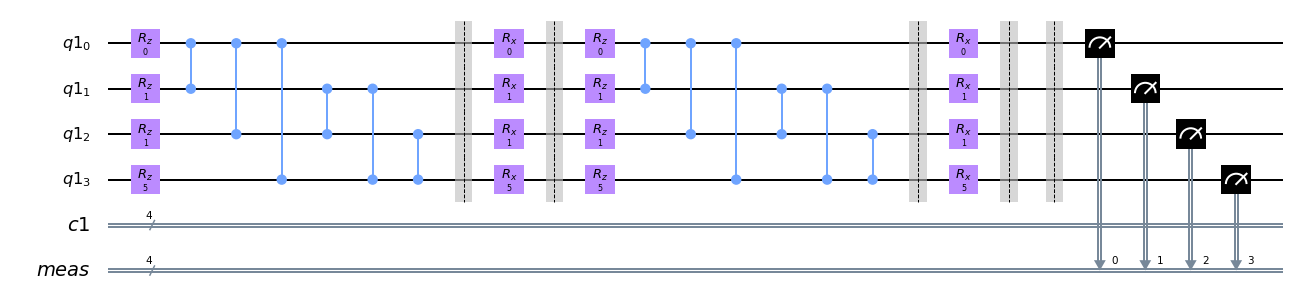

In [306]:
numIterations = 500
n_layers = 2
# rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))[0]
rand_params = np.array([0.0,1,1,5])
alpha = 0.1
history = []
x = np.array([0,0,0,0])
start_loss = 9999
for i in range(0,numIterations):
    circ = Task1(n_layers,params=rand_params)
    job = execute(circ, simulator)
    result = job.result()
    state_vector = result.get_statevector(circ)
    # # print(state_fidelity(random_state_vector,state_vector))
    loss = np.linalg.norm(state_vector - random_state_vector)
    
    cost = cost_fn(loss,4)
    grad = np.dot(x.T,loss)
    print('interation : {}'.format(i+1))
    print('cost : {}'.format(cost))
    print('----------------------------')
    rand_params -= (alpha*grad)/4
    

    
    history.append(cost)
circ.draw(output='mpl')

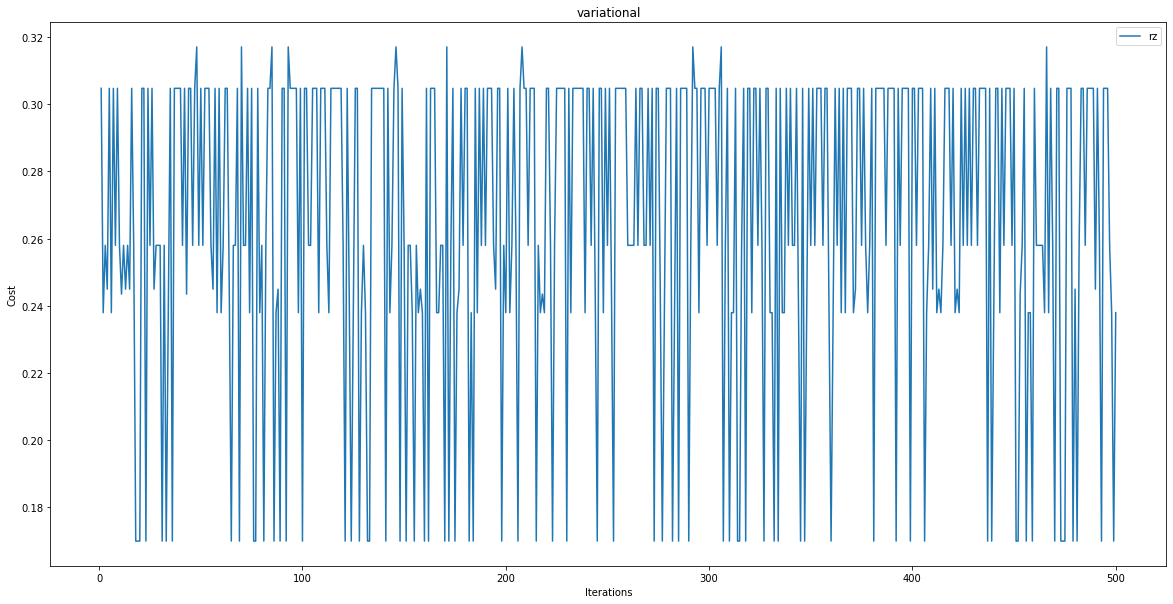

In [296]:
plt.figure(figsize=(20,10))
plt.plot(range(1, len(history) + 1), history)
plt.legend(['rz'], loc='upper right')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('variational')
plt.show()


In [327]:
best = 999
n_layers = 2
limit = 4
start_params = np.array([0.0,0.0,0.0,0.0])
alpha = 0.01
history = []
x = np.array([0,0,0,0])
params = start_params
for i in range(limit):
    for j in range(limit):
        for k in range(limit):
            for l in range(limit):
                circ = Task1(n_layers,params=params)
                job = execute(circ, simulator)
                result = job.result()
                state_vector = result.get_statevector(circ)
                loss = np.linalg.norm(state_vector - random_state_vector)
                cost = cost_fn(loss,4)
                if cost < best:
                    best = cost
                    history.append(cost)
                    print(cost)
                params = start_params + alpha * np.array([i,j,k,l])

0.2617393425747043
0.22227999438065507


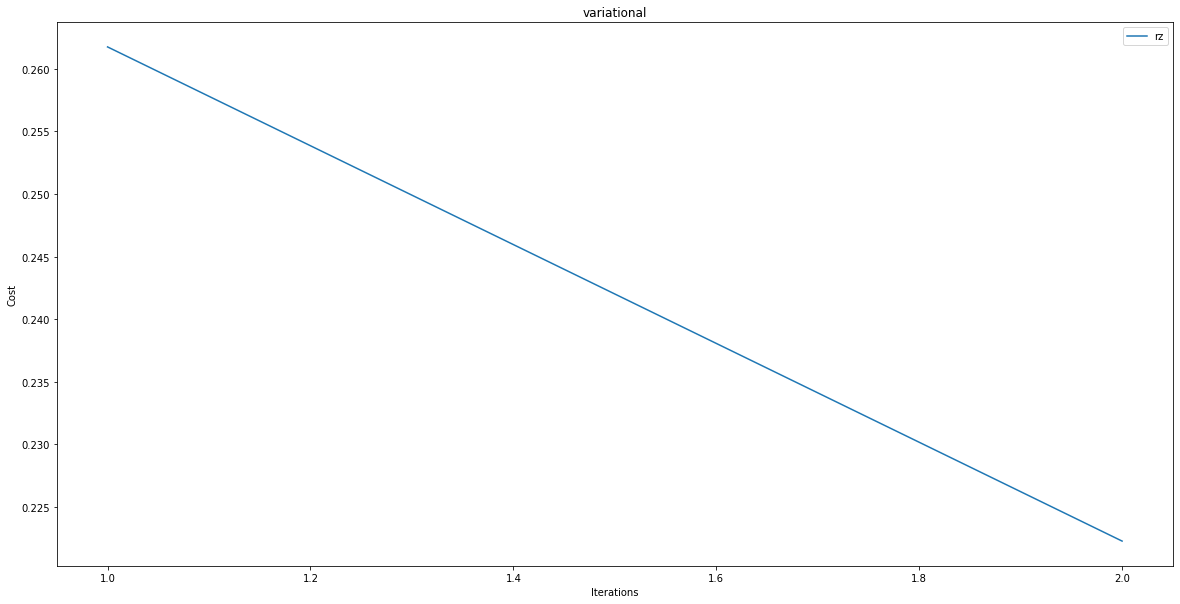

In [328]:
plt.figure(figsize=(20,10))
plt.plot(range(1, len(history) + 1), history)
plt.legend(['rz'], loc='upper right')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('variational')
plt.show()